### 로지스틱 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=100, rate=0.01):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

In [9]:
x = np.array([1,2,3,4,5,6,7,8,12])
y = np.array([0,0,0,0,1,1,1,1,1])

In [10]:
neuron = Neuron()
neuron.fit(x,y,1000)
print(neuron.w)
print(neuron.b)

0.0565859641639946
0.12253931061102914


1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 양성종양
6 : 양성종양
7 : 악성종양
8 : 악성종양
12 : 악성종양


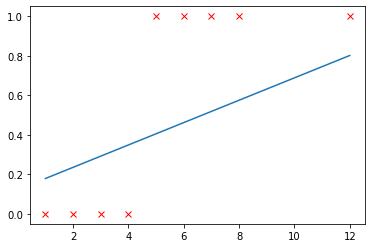

In [11]:
for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

### 오즈비 그래프 

In [13]:
a = np.arange(0, 10, 1)
print(a)
b = np.arange(0, 1, 0.01)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [16]:
a = [i+1 for i in range(0,10)]
b = [j*10 for j in a]
print(type(b))
print(b)

<class 'list'>
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


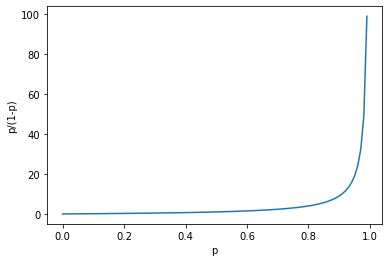

In [18]:
import numpy as np
import matplotlib.pyplot as plt

probs = np.arange(0, 1, 0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

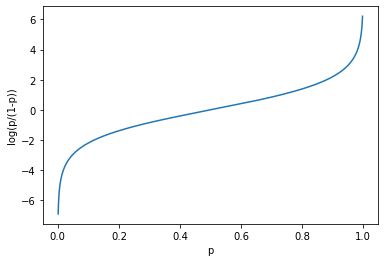

In [19]:
probs  = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

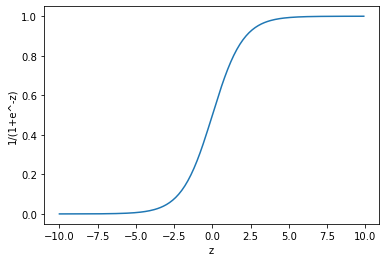

In [20]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
30 : 악성종양


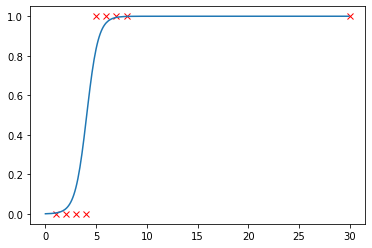

In [23]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.1*w_grad          # 가중치 업데이트
                self.b -= 0.1*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,30])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

### Binary Cross Entropy 함수

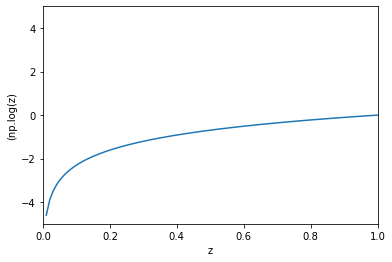

In [24]:
zs = np.arange(0.01, 10., 0.01)
gs = [np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(-5,5)
plt.xlabel('z')
plt.ylabel('(np.log(z)')
plt.show()

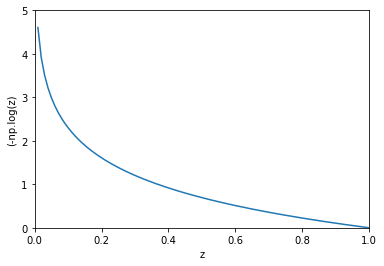

In [66]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

<ipython-input-25-101306523065>:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs]
<ipython-input-25-101306523065>:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs]


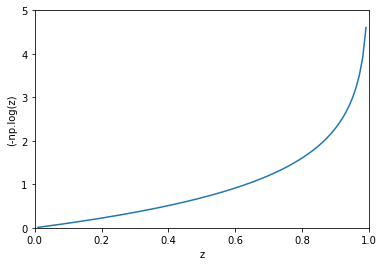

In [25]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

### 로지스틱 구현

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)
len(cancer.data[0])

(569, 30) (569,)


30

In [22]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

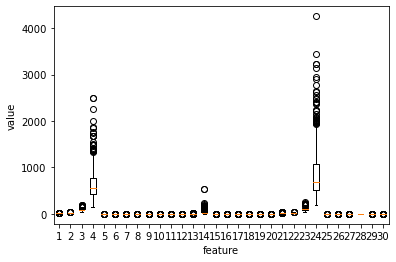

In [23]:
import matplotlib.pyplot as  plt
import numpy as np
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [24]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
a = np.array([1,2,3,4,5])  # 정수 인덱싱
print(a[[1,3]])

[2 4]


In [26]:
cancer.feature_names[[3,23]]

array(['mean area', 'worst area'], dtype='<U23')

In [27]:
x = cancer.data

In [28]:
a = np.array([1,1,2,2,2,3,3,4,4,4,4,5])
print(np.unique(a,return_counts=True))

(array([1, 2, 3, 4, 5]), array([2, 3, 2, 4, 1], dtype=int64))


In [29]:
y = cancer.target
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
test_size=0.2, random_state=42)

In [32]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [37]:
print(x_train.shape)
print(x_train.ndim)
print(len(x_train))
print(x_train.shape[0])
print(x_train.shape[1])

(455, 30)
2
455
455
30


In [ ]:
a=np.array([1,2,3])
b=np.array([2,2,2]) # 배열을 멤버끼리 곱이 된다. 
c=a*b
print(c)

In [38]:
a=np.array([1,2,3])
b=np.array([2,2,2,2]) # 배열을 멤버끼리 곱이 된다. 
c=a*b
print(c)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

###  두 배열의 내적 구하기 

In [40]:
a=np.array([[1,2,3],[1,2,3]])     # (2, 3)
b=np.ones(a.shape[1])             # np.ones(3)
c = np.sum(a[0]*b)                   # [1,2,3] => 1+2+3
c

6.0

In [41]:
b=np.ones(3)
print(b)

[1. 1. 1.]


In [42]:
b=np.ones((3,2))
print(b)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [47]:
temp = np.exp(-2000)
print(temp)

0.0


In [48]:
a = np.array([1,2,3,4,5,6,7,8,9])
b = np.clip(a, 3, None)
print(b)

[3 3 3 4 5 6 7 8 9]


In [49]:
a = np.array([1,2,3,4,5,6,7,8,9])
b = np.clip(a, 3, 7)
print(b)

[3 3 3 4 5 6 7 7 7]


### broadcast ( 브로드 캐스트)

In [50]:
a = np.array([1,2,3])
b = 1      # [1,1,1]
c = a + b
print(c)

[2 3 4]


In [53]:
a = np.array([1,2,3])
b = 2      # [2,2,2]
c = a * b
print(c)

[2 4 6]


In [52]:
a = np.array([1,2,3])
b = np.array([1,2,3,4])
c = a + b
print(c)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [56]:
import matplotlib.pyplot as  plt
import numpy as np

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w)  + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200,rate=0.01):
        self.w = np.ones(x.shape[1])
        self.b = 0

        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)
                err = a - y_i             # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [57]:
neuron = LogisticNeuron()
neuron.fit( x_train, y_train,1000)

In [65]:
# print( neuron.predict(x_test))
# print( neuron.predict(x_test)==y_test)
# print( np.sum(neuron.predict(x_test)==y_test))
# print( len(neuron.predict(x_test) ) )
np.mean(neuron.predict(x_test)==y_test)

0.8157894736842105

In [69]:
a = np.array([1,2,3,4,5])
sum = np.sum(a)
print(sum)
print(sum/len(a))
mean = np.mean(a)
print(mean)

15
3.0
3.0


#### np.mean()을 활용한 정답률 계산

In [72]:
# a = np.array([1,1,1,1,1,1,1,1,1,1,0])
a = np.array([True,True,True,True,True,True,True,True,True,True,False])
sum = np.sum(a)
# print(sum)
# print(sum/len(a))
mean = np.mean(a)
print(mean)

0.9090909090909091
